In [1]:
#Import Libraries and Files
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

file = "/Users/juliarivera/Desktop/itmgt25/transaction-data-adhoc-analysis.json"


df_1 = pd.read_json(file)
df_1

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [2]:
# Pivot Table (Sales per month, sale value per item per month)

In [3]:
#Clean data
import string
df_p = df_1.copy()
df_p_2 = df_p.transaction_items.str.split(";")
df_p = df_p.assign(transaction_items=df_p_2)
df_p = df_p[df_p["transaction_items"].apply(len)==1]
df_p['transaction_items'] = [','.join(map(str, l)) for l in df_p['transaction_items']]
df_p['quantities'] = df_p["transaction_items"].str[-5:]
df_p['quantities'] = df_p["quantities"].str.strip(',)(x')
df_p["quantities"] = df_p["quantities"].astype(int)
df_p["transaction_items"] = df_p["transaction_items"].str[:-5]

df_p


,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,quantities
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon",5196,2022/01/12,4
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables",500,2022/01/10,1
6,USS Ware\nFPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,"Exotic Extras,Kimchi and Seaweed",3196,2022/01/20,4
8,"63261 Brewer Drive Apt. 704\nLake Alicia, NJ 0...",1956/08/27,racheldiaz@gmail.com,Jennifer Figueroa,F,hoodbrett,"Candy City,Gummy Worms",150,2022/01/11,1
11,"2049 Schneider Walk\nScottfurt, DC 18004",1993/10/21,codydavis@gmail.com,Steven Woods,M,amandahill,"HealthyKid 3+,Gummy Vitamins",3000,2022/01/01,2
...,...,...,...,...,...,...,...,...,...,...
83014,"6047 Kelly Parkways Suite 417\nAdamsberg, DE 7...",1950/05/22,angela20@hotmail.com,Bryan Kelley,M,joshua80,"HealthyKid 3+,Nutrional Milk",7960,2022/06/29,4
83017,"1783 Snyder Plaza\nMontgomerychester, DC 09252",2022/01/27,powellkirk@hotmail.com,Mark Young,M,spencer43,"HealthyKid 3+,Nutrional Milk",1990,2022/06/11,1
83019,"5868 Sloan Springs Suite 982\nRobinsonmouth, O...",1992/12/26,careyjason@gmail.com,Kathryn Cisneros,F,gregorywest,"Candy City,Orange Beans",199,2022/06/26,1
83024,"31450 Perez Burgs\nWest Douglas, KS 03442",1946/10/26,tyler82@hotmail.com,Caleb Vaughn,M,troyedwards,"Exotic Extras,Beef Chicharon",3897,2022/06/28,3


In [4]:
items = df_p[["transaction_items", "quantities", "transaction_value"]]
items = items.drop_duplicates(subset = "transaction_items", keep = "first")
index = list(items["transaction_items"].values)
items = items['transaction_value'] / items['quantities']
items.index = index
items

Exotic Extras,Beef Chicharon        1299.0
HealthyKid 3+,Yummy Vegetables       500.0
Exotic Extras,Kimchi and Seaweed     799.0
Candy City,Gummy Worms               150.0
HealthyKid 3+,Gummy Vitamins        1500.0
HealthyKid 3+,Nutrional Milk        1990.0
Candy City,Orange Beans              199.0
dtype: float64

In [5]:
df_2 = df_1.assign(transaction_items=df_1.transaction_items.str.split(";")).explode('transaction_items').reset_index(drop=True)
df_2['quantities'] = df_2["transaction_items"].str[-5:]
df_2['quantities'] = df_2["quantities"].str.strip(',)(x')
df_2["quantities"] = df_2["quantities"].astype(int)
df_2["transaction_items"] = df_2["transaction_items"].str[:-5]
df_2["Total Sales"] = df_2["quantities"] * df_2["transaction_items"].apply(lambda x: items.loc[x])
df_2["Month"] = df_2["transaction_date"].str[6:7]
df_2

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,quantities,Total Sales,Month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon",5196,2022/01/12,4,5196.0,1
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon",12056,2022/01/12,3,3897.0,1
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk",12056,2022/01/12,4,7960.0,1
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans",12056,2022/01/12,1,199.0,1
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins",5500,2022/01/08,3,4500.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk",4280,2022/06/09,2,3980.0,6
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms",4280,2022/06/09,2,300.0,6
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk",2639,2022/06/03,1,1990.0,6
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms",2639,2022/06/03,3,450.0,6


In [6]:
#Pivot Table - by transaction and month
df_pivot = df_2[['Total Sales','quantities']].groupby([df_2.transaction_items, df_2.Month]).agg(sum)
df_pivot


Total Sales  quantities
transaction_items                Month                         
Candy City,Gummy Worms           1        1433850.0        9559
                                 2        1499400.0        9996
                                 3        1497900.0        9986
                                 4        1506450.0       10043
                                 5        1470150.0        9801
                                 6        1490100.0        9934
Candy City,Orange Beans          1        1945026.0        9774
                                 2        1997363.0       10037
                                 3        1912589.0        9611
                                 4        1972886.0        9914
                                 5        1982836.0        9964
                                 6        2011094.0       10106
Exotic Extras,Beef Chicharon     1       12554835.0        9665
                                 2       12991299.0       10001
                                 3       12750984.0        9816
                                 4       12847110.0        9890
                                 5       13026372.0       10028
                                 6       12862698.0        9902
Exotic Extras,Kimchi and Seaweed 1        7731124.0        9676
                                 2        7949251.0        9949
                                 3        7963633.0        9967
                                 4        7926879.0        9921
                                 5        7808627.0        9773
                                 6        8073096.0       10104
HealthyKid 3+,Gummy Vitamins     1       14521500.0        9681
                                 2       14970000.0        9980
                                 3       15217500.0       10145
                                 4       14763000.0        9842
                                 5       14922000.0        9948
                                 6       14970000.0        9980
HealthyKid 3+,Nutrional Milk     1       19356730.0        9727
                                 2       19285090.0        9691
                                 3       19653240.0        9876
                                 4       19474140.0        9786
                                 5       19663190.0        9881
                                 6       19436330.0        9767
HealthyKid 3+,Yummy Vegetables   1        4979500.0        9959
                                 2        5128000.0       10256
                                 3        4948000.0        9896
                                 4        4930500.0        9861
                                 5        4867500.0        9735
                                 6        4861000.0        9722

In [7]:
df_pivot_2 = df_pivot.reset_index()

df_pivot_2

,transaction_items,Month,Total Sales,quantities
0,"Candy City,Gummy Worms",1,1433850.0,9559
1,"Candy City,Gummy Worms",2,1499400.0,9996
2,"Candy City,Gummy Worms",3,1497900.0,9986
3,"Candy City,Gummy Worms",4,1506450.0,10043
4,"Candy City,Gummy Worms",5,1470150.0,9801
5,"Candy City,Gummy Worms",6,1490100.0,9934
6,"Candy City,Orange Beans",1,1945026.0,9774
7,"Candy City,Orange Beans",2,1997363.0,10037
8,"Candy City,Orange Beans",3,1912589.0,9611
9,"Candy City,Orange Beans",4,1972886.0,9914


In [8]:
import sys
!{sys.executable} -m pip install seaborn

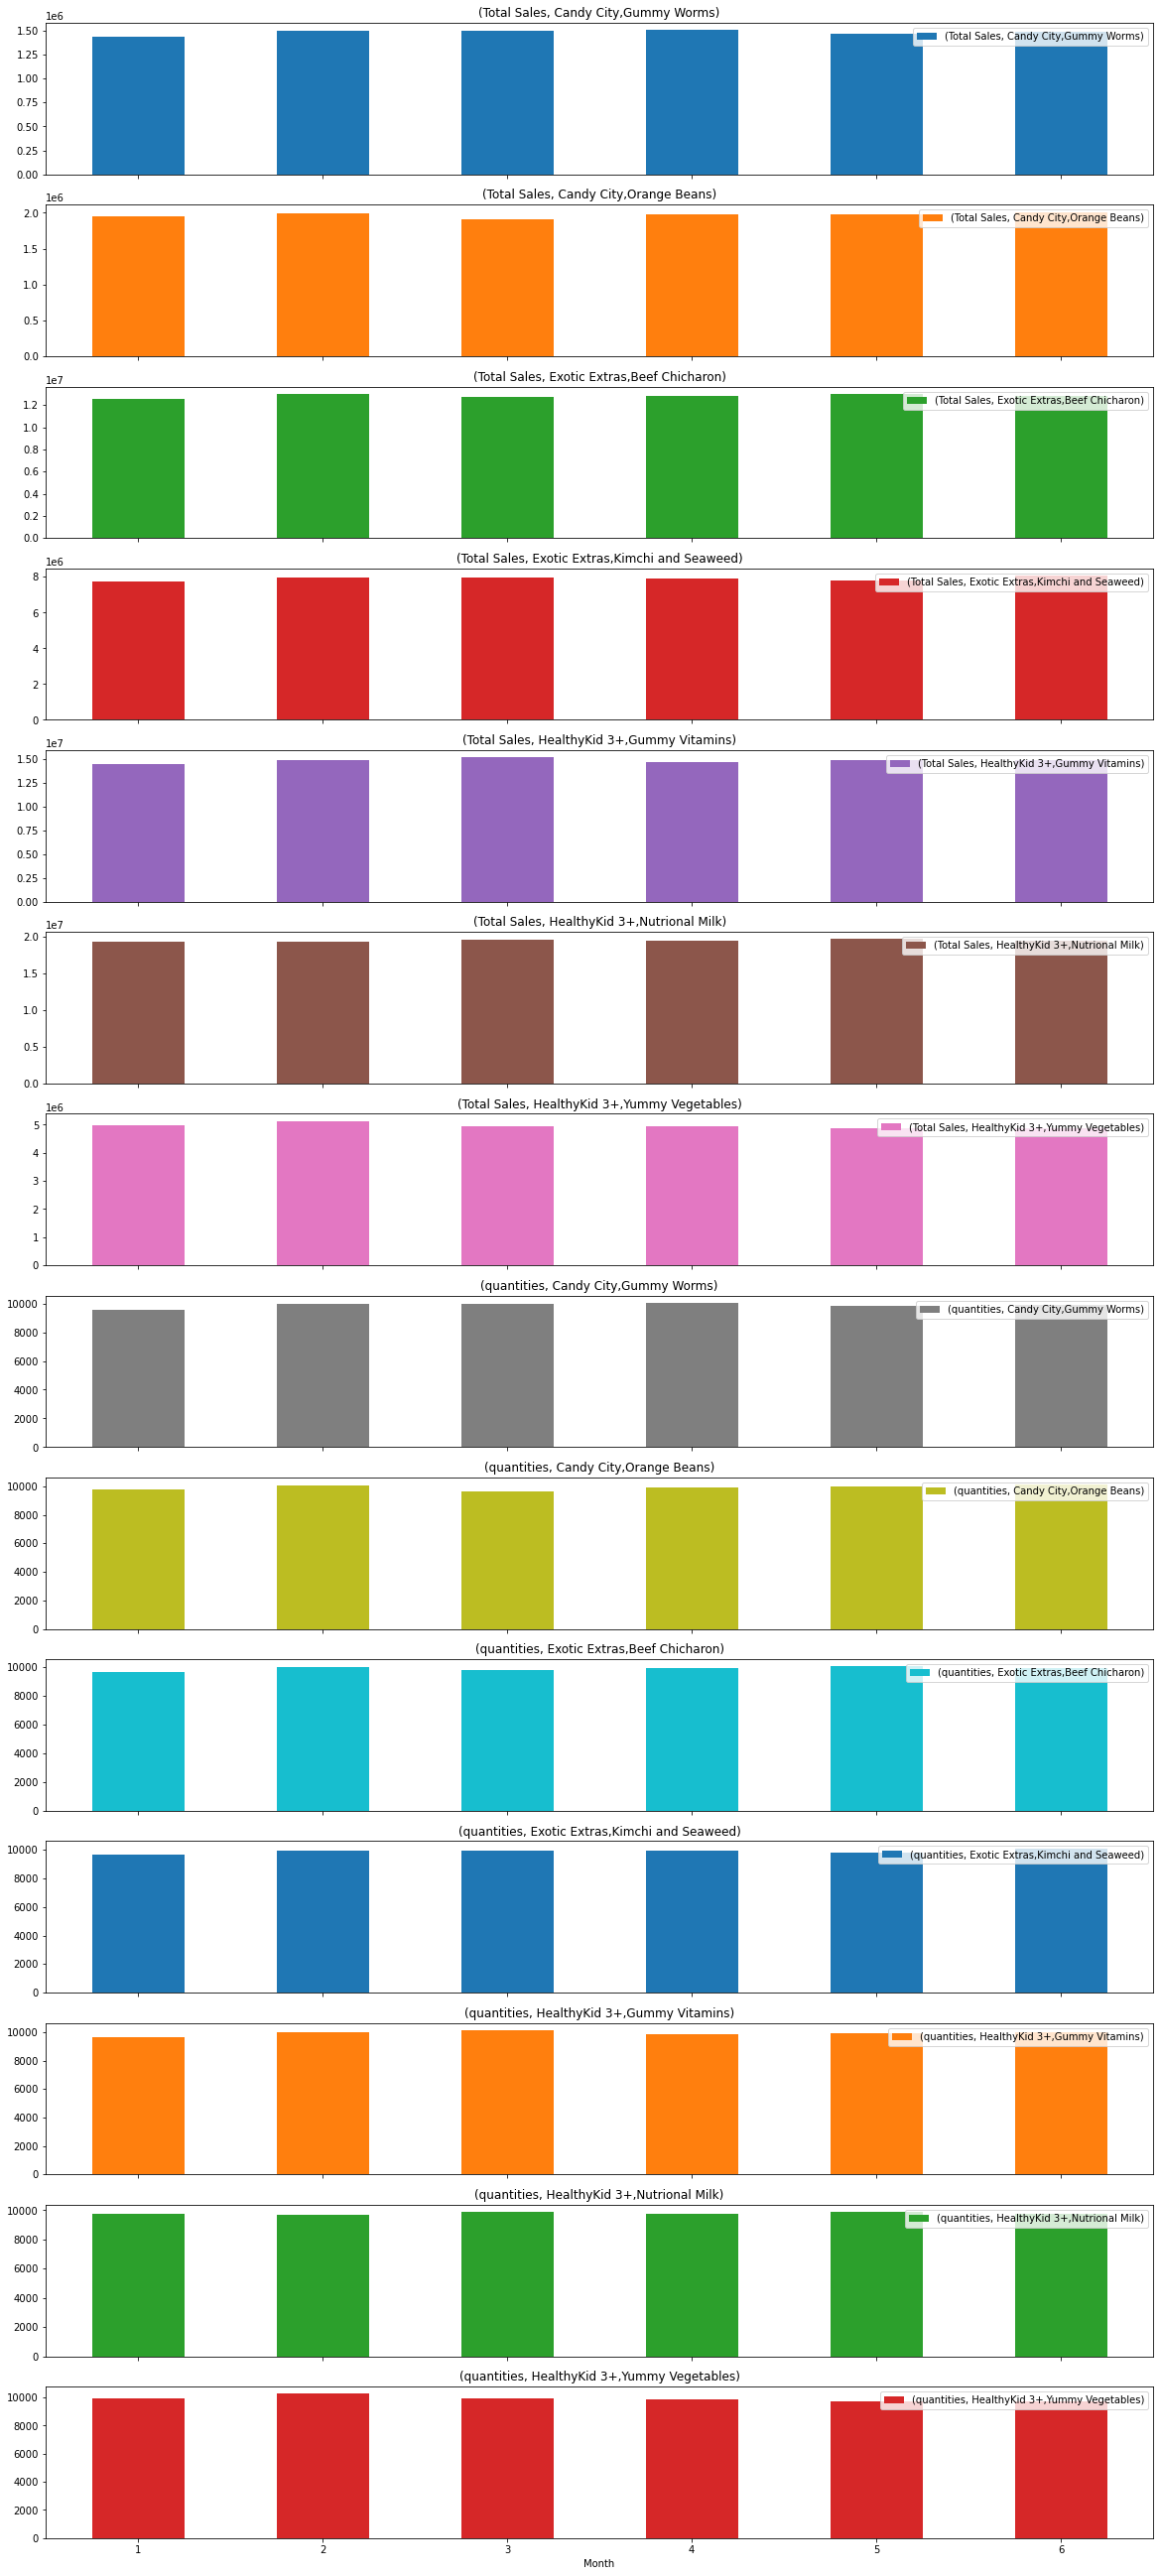

In [9]:

ax = df_pivot.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 50), layout=(15, 1))


In [10]:
#Data Frame for Graphs

df_g1 = df_2[['Total Sales','quantities']].groupby([df_2.transaction_items]).agg(sum)
df_g1 = df_g1.reset_index()

df_g1

,transaction_items,Total Sales,quantities
0,"Candy City,Gummy Worms",8897850.0,59319
1,"Candy City,Orange Beans",11821794.0,59406
2,"Exotic Extras,Beef Chicharon",77033298.0,59302
3,"Exotic Extras,Kimchi and Seaweed",47452610.0,59390
4,"HealthyKid 3+,Gummy Vitamins",89364000.0,59576
5,"HealthyKid 3+,Nutrional Milk",116868720.0,58728
6,"HealthyKid 3+,Yummy Vegetables",29714500.0,59429


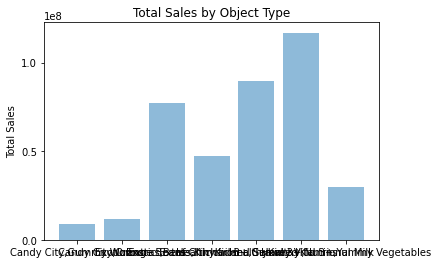

In [11]:


y_pos = np.arange(len(df_g1['Total Sales']))

plt.bar(y_pos, df_g1['Total Sales'], align='center', alpha=0.5)
plt.xticks(y_pos,df_g1['transaction_items'])
plt.ylabel('Total Sales')
plt.title('Total Sales by Object Type')
plt.rcParams["figure.figsize"] = (100,50)
plt.rcParams.update({'font.size': 25})
plt.show()



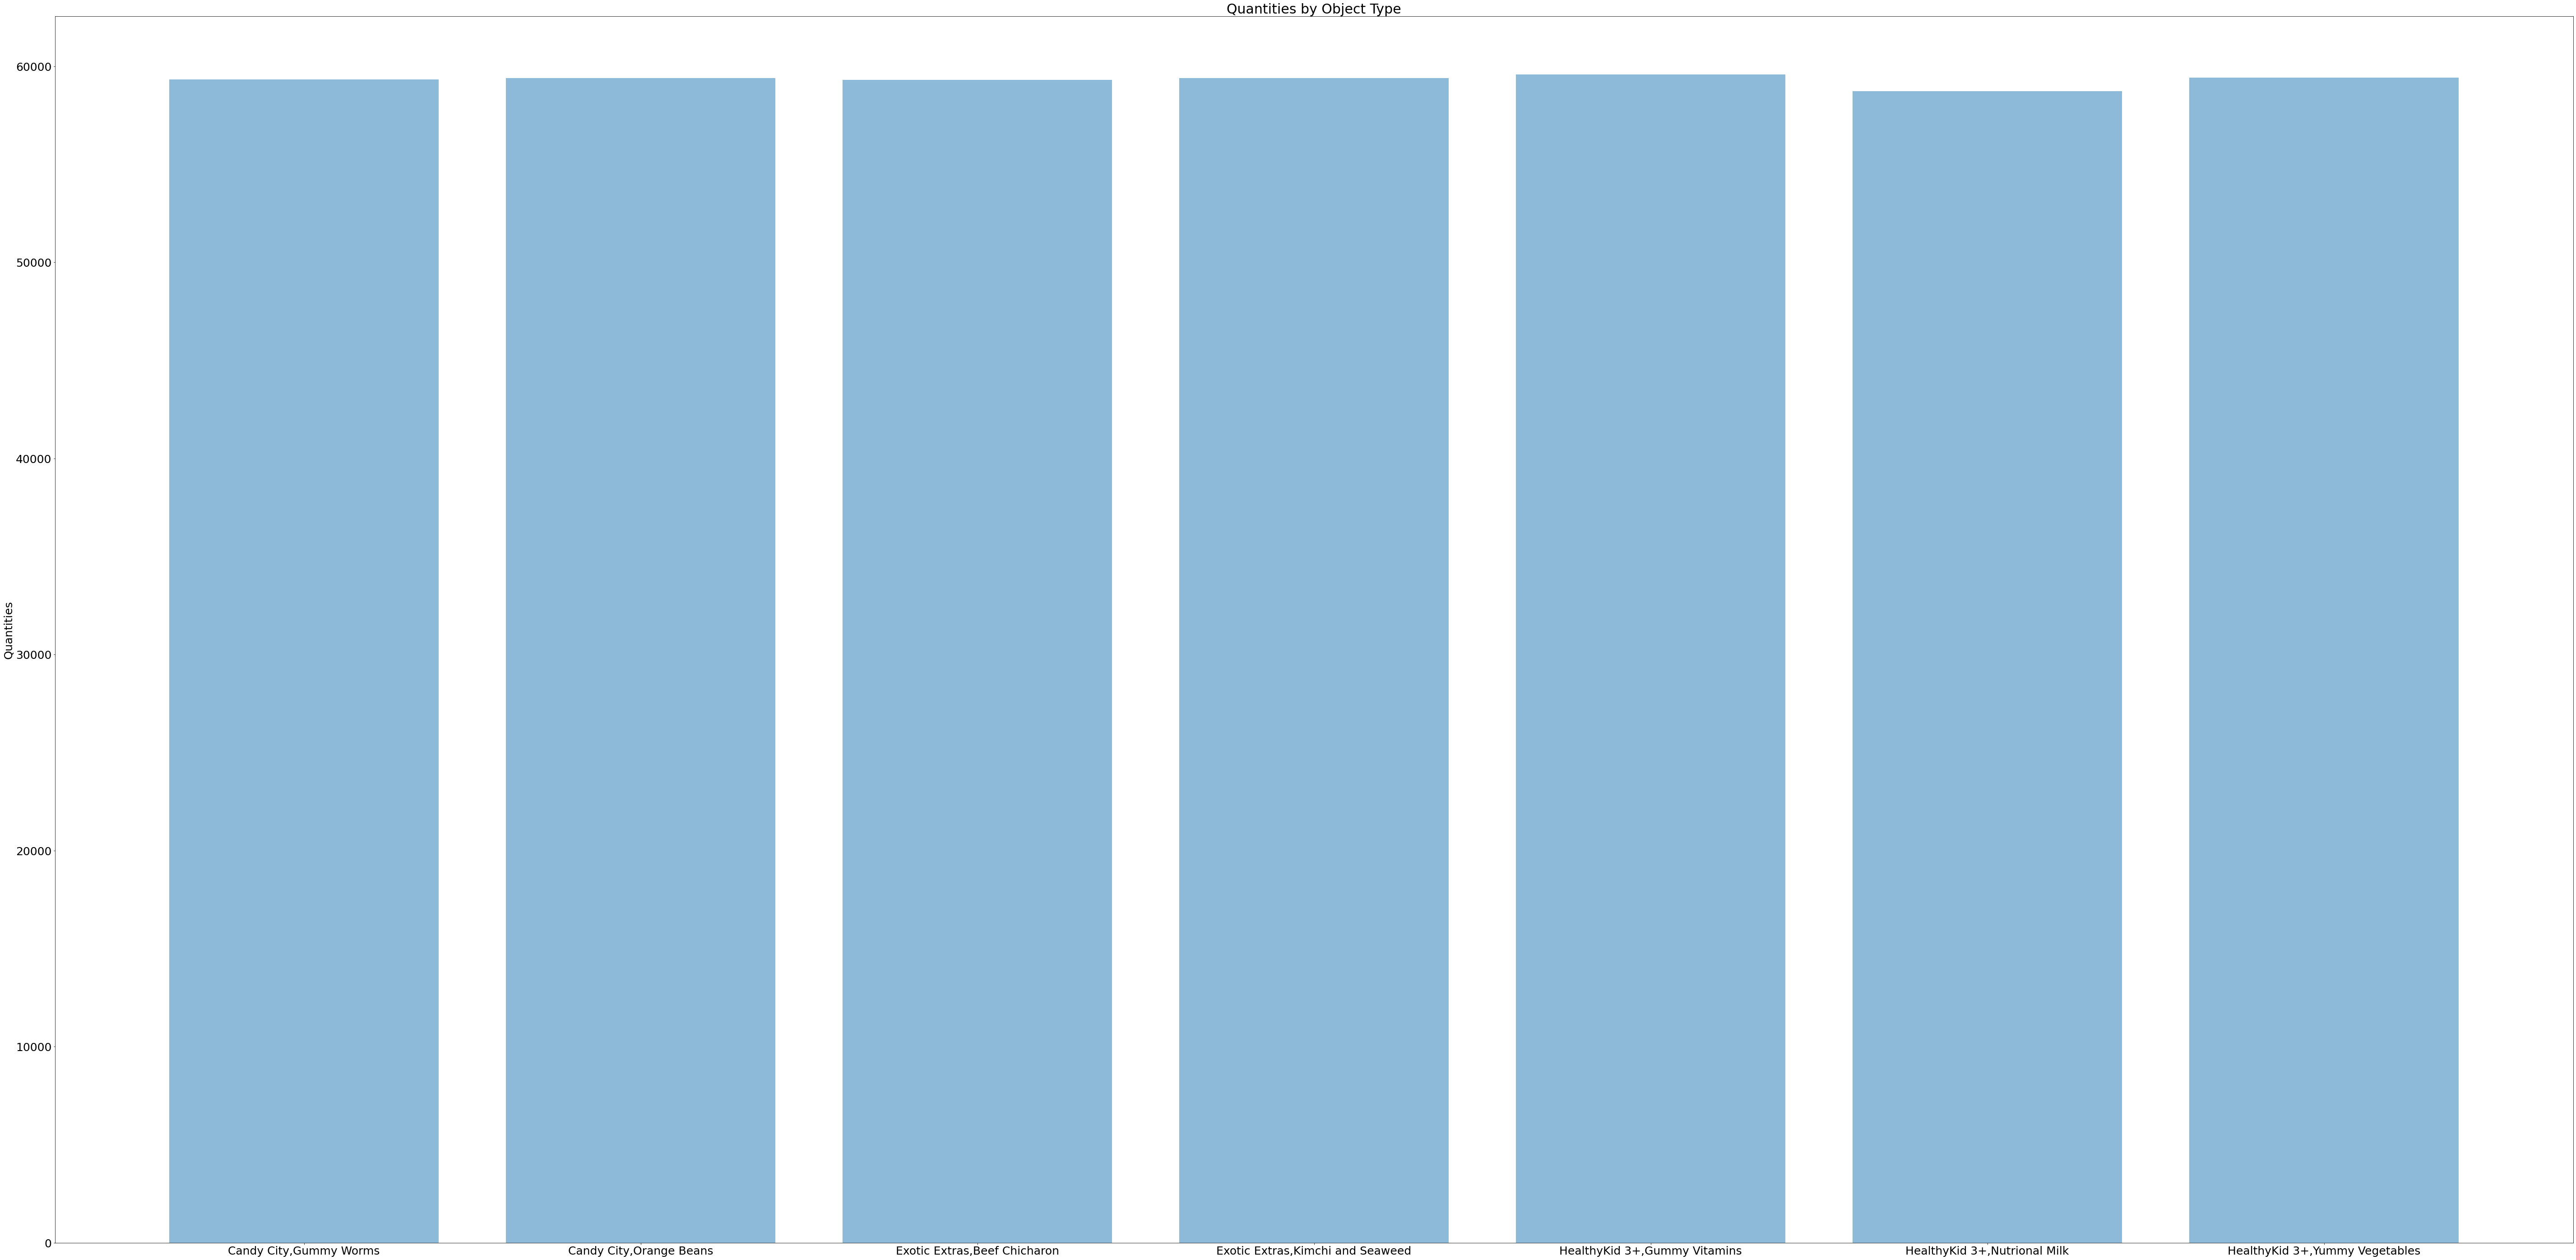

In [12]:

y_pos = np.arange(len(df_g1['quantities']))

plt.bar(y_pos, df_g1['quantities'], align='center', alpha=0.5)
plt.xticks(y_pos,df_g1['transaction_items'])
plt.ylabel('Quantities')
plt.title('Quantities by Object Type')
plt.rcParams["figure.figsize"] = (50,50)
plt.rcParams.update({'font.size': 25})
plt.show()




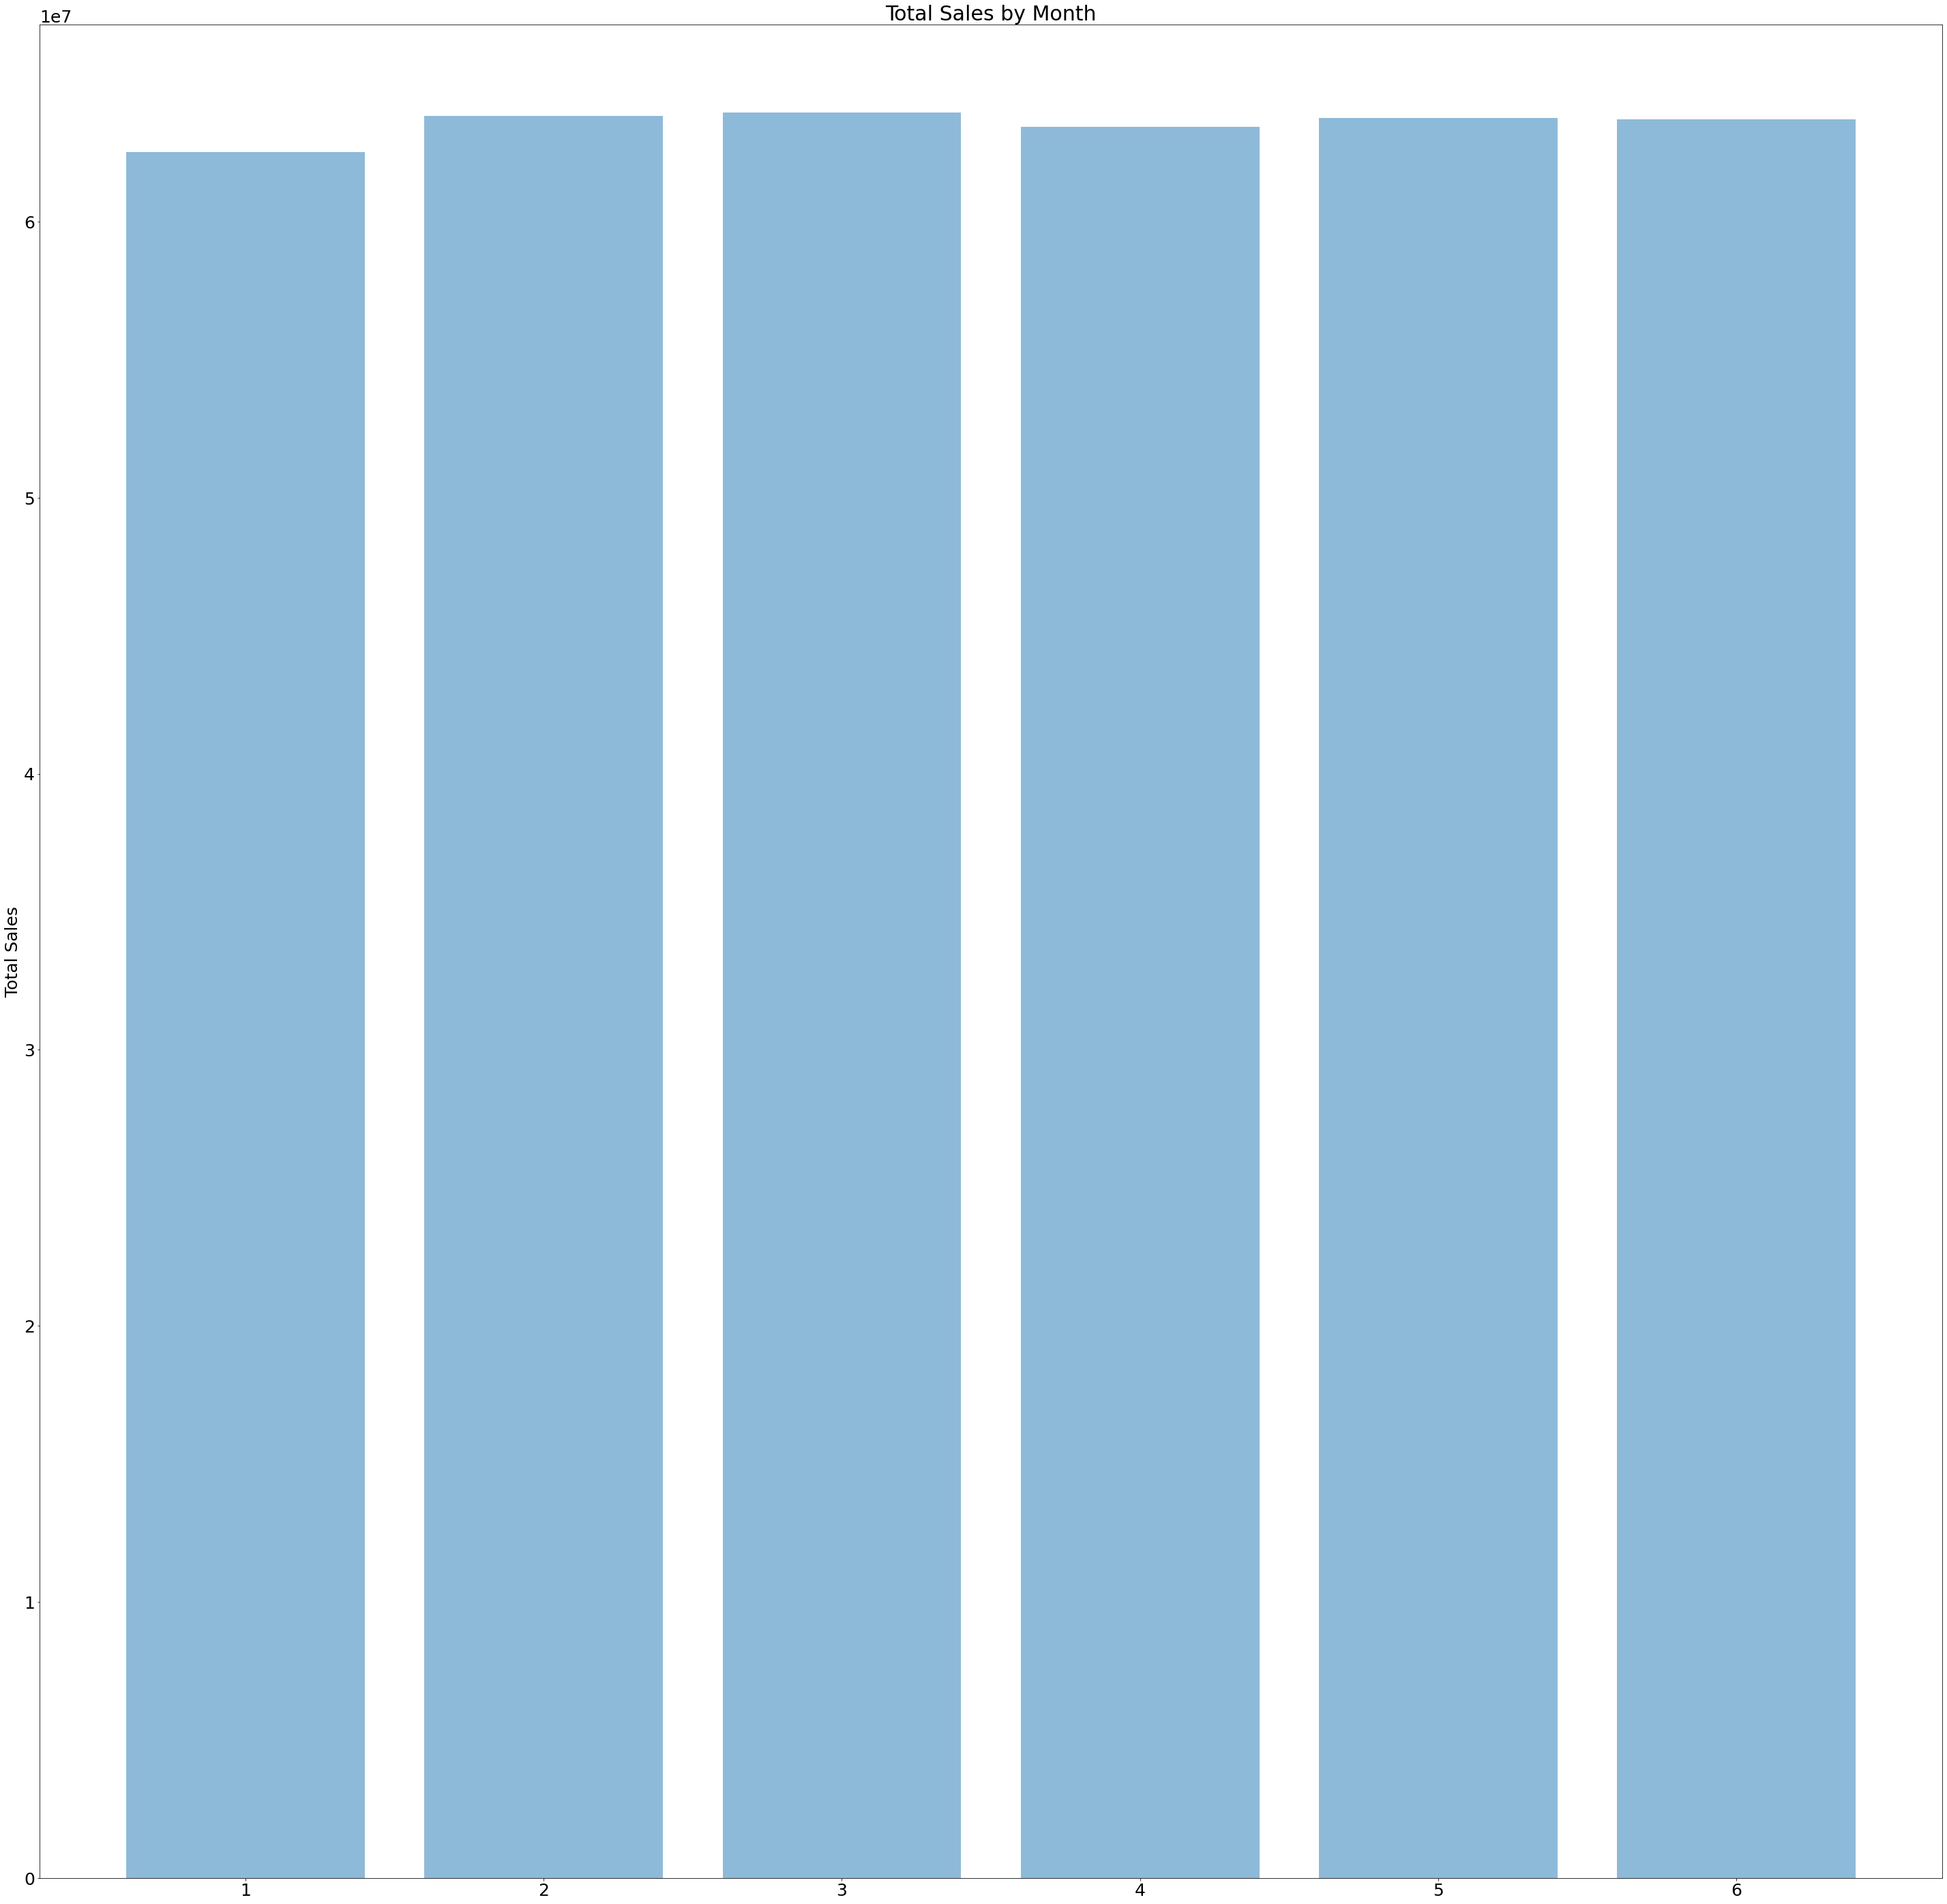

In [13]:
df_g2 = df_2[['Total Sales','quantities']].groupby([df_2.Month]).agg(sum).reset_index()

y_pos = np.arange(len(df_g2['Total Sales']))

plt.bar(y_pos, df_g2['Total Sales'], align='center', alpha=0.5)
plt.xticks(y_pos,df_g2['Month'])
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.rcParams["figure.figsize"] = (50,50)
plt.rcParams.update({'font.size': 50})
plt.show()




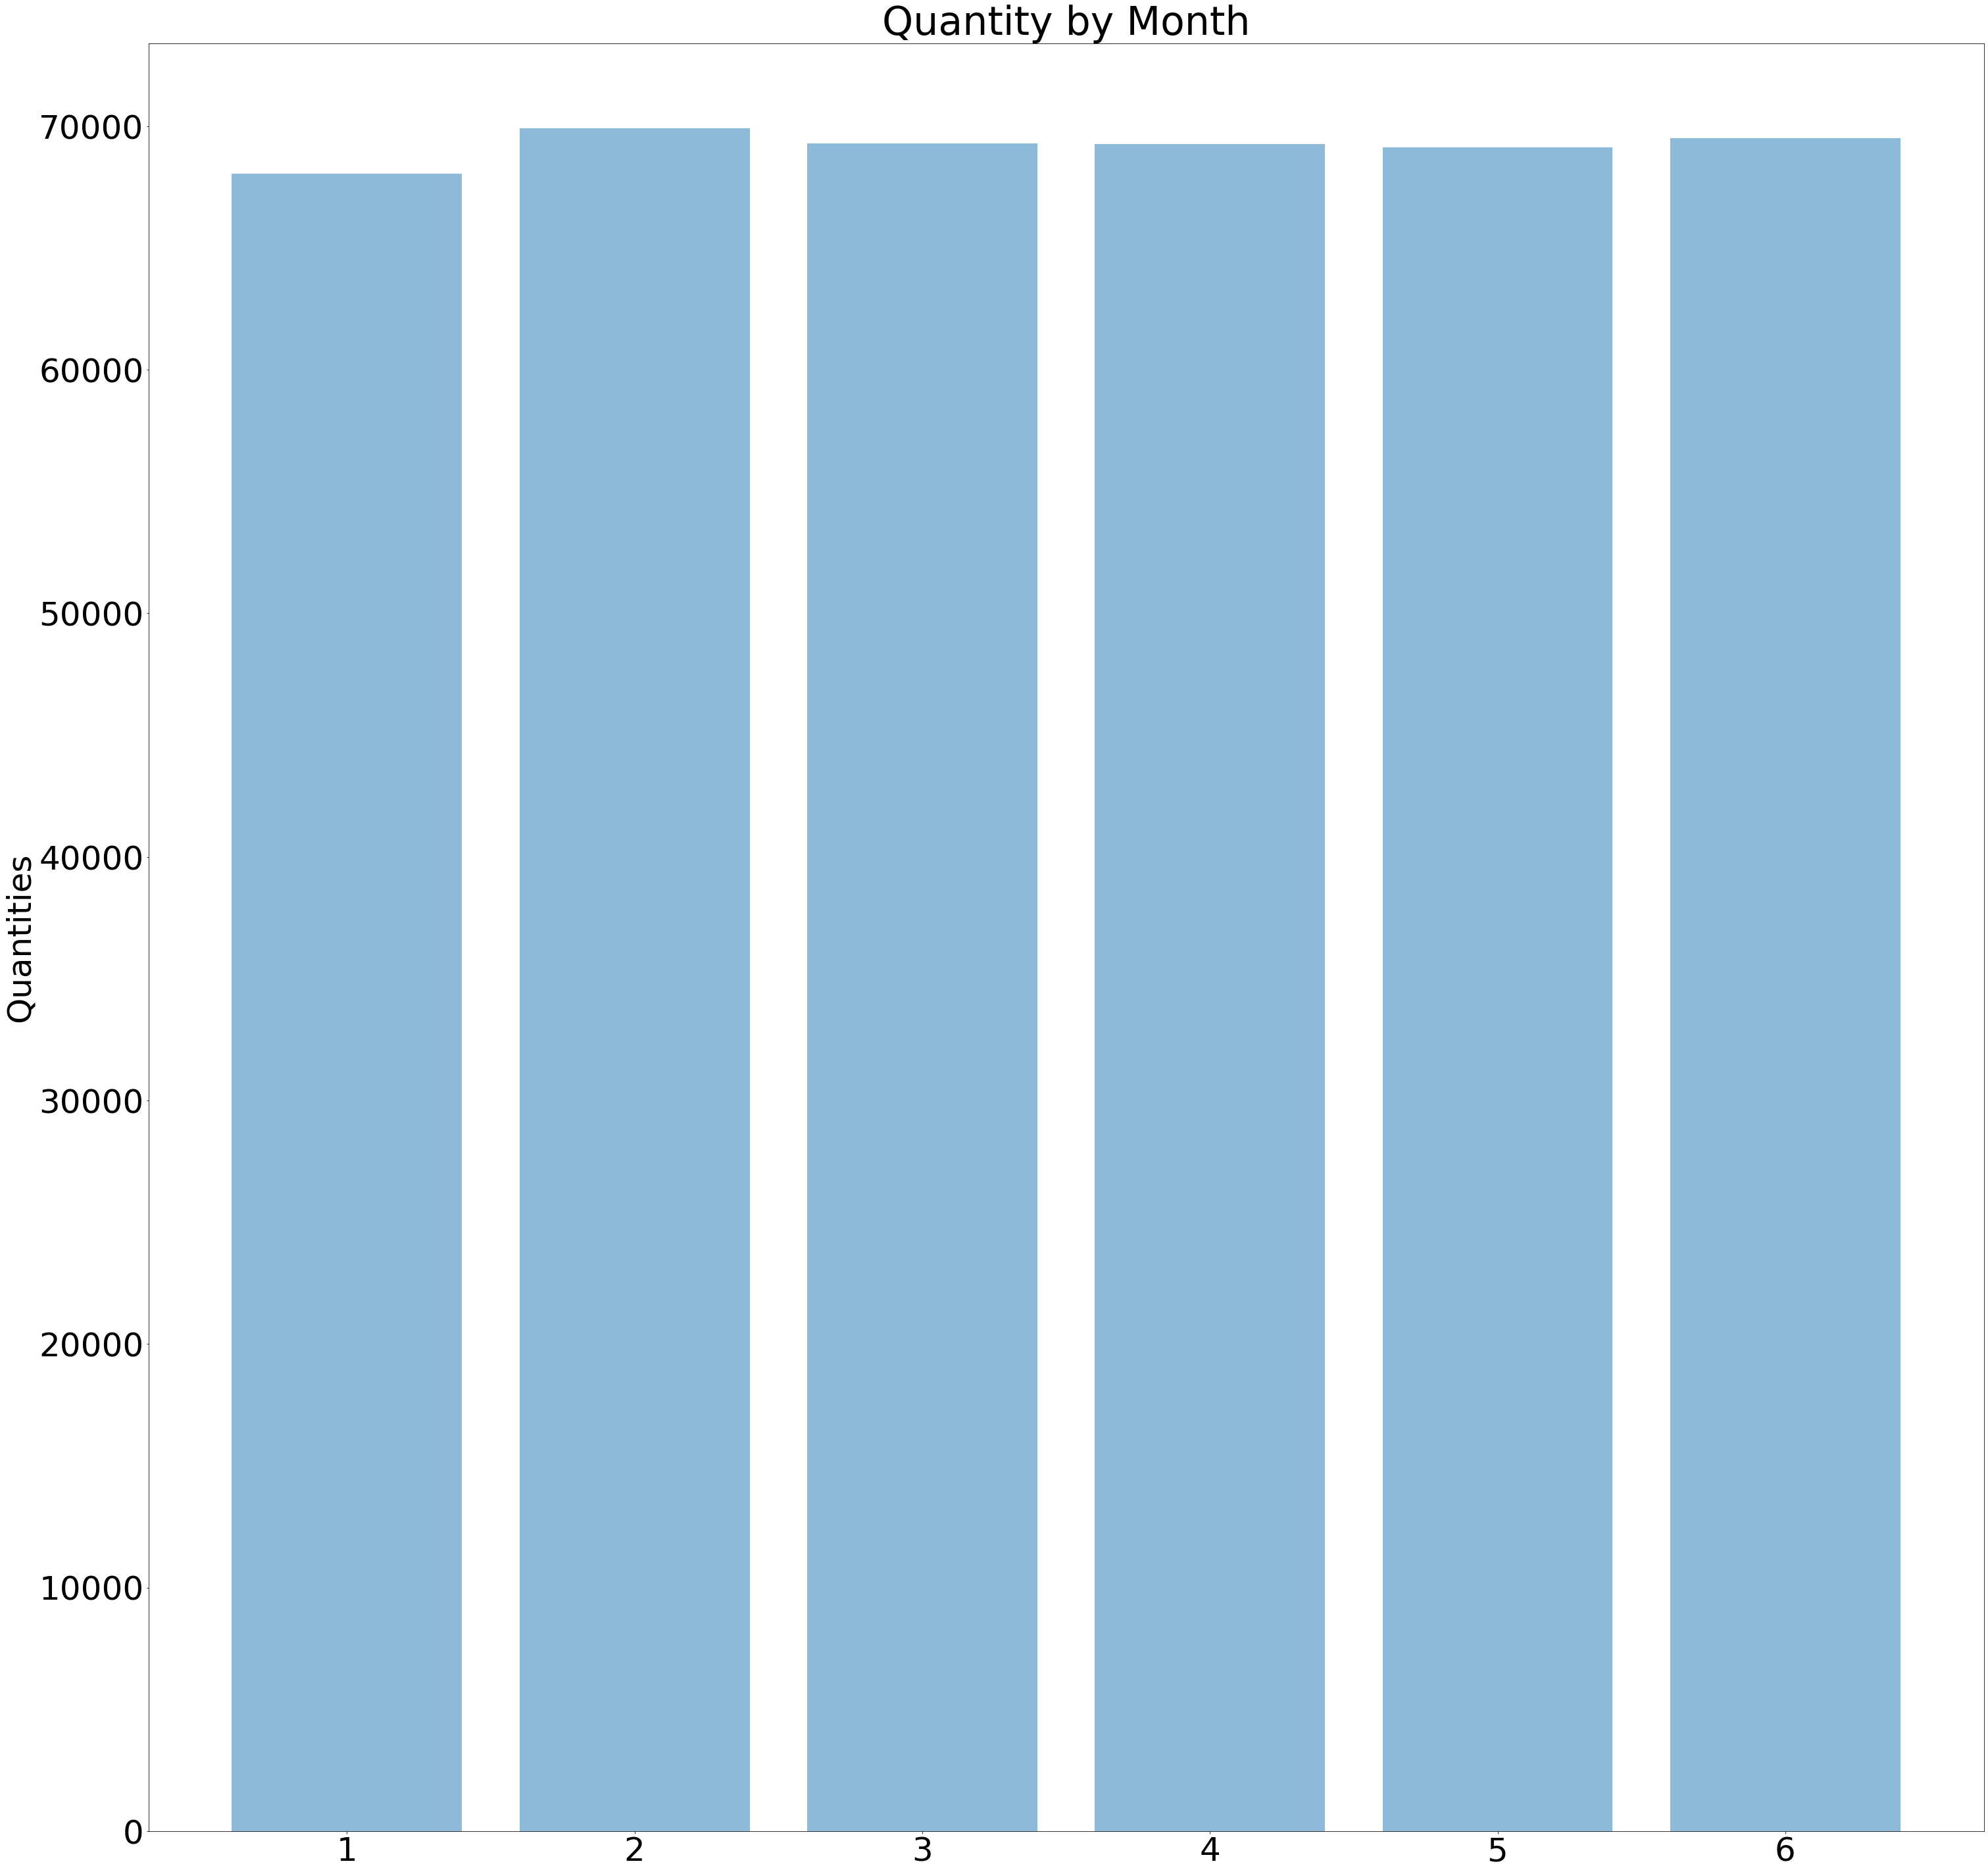

In [14]:
y_pos = np.arange(len(df_g2['quantities']))

plt.bar(y_pos, df_g2['quantities'], align='center', alpha=0.5)
plt.xticks(y_pos,df_g2['Month'])
plt.ylabel('Quantities')
plt.title('Quantity by Month')
plt.rcParams["figure.figsize"] = (50,50)
plt.rcParams.update({'font.size': 25})
plt.show()





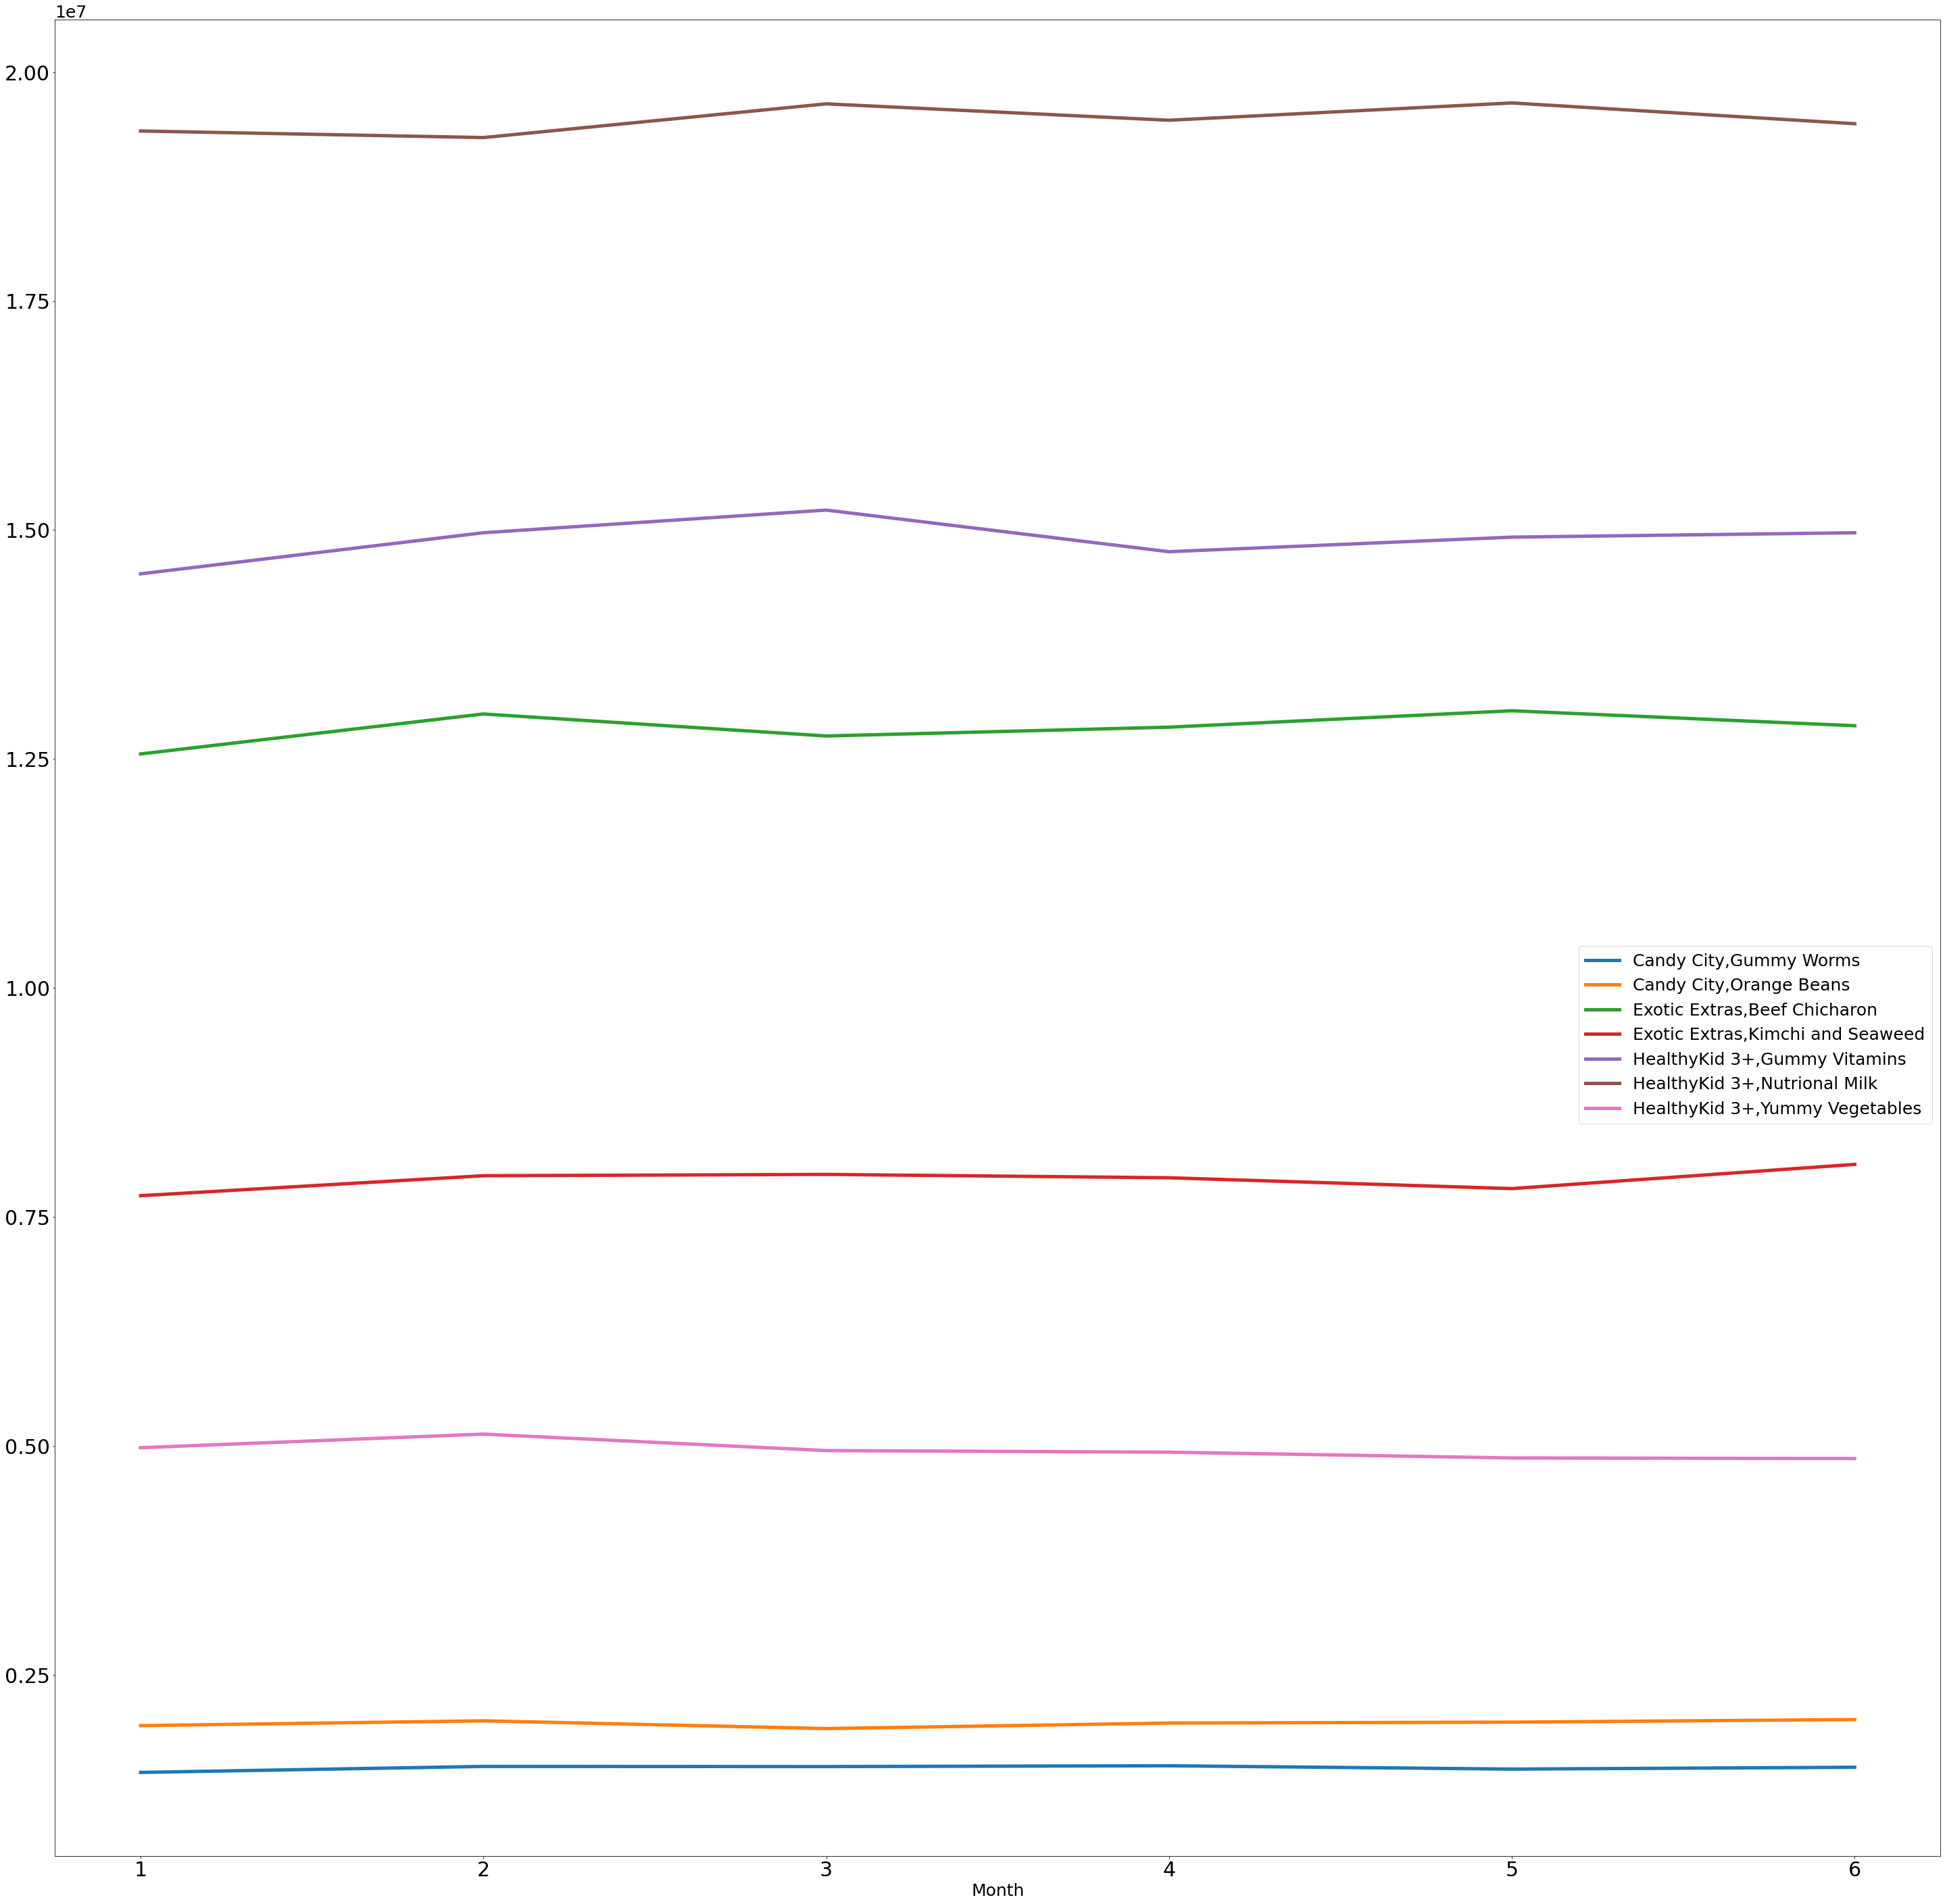

In [15]:
df_2.pivot_table(index=["Month"], columns='transaction_items', values='Total Sales', aggfunc='sum').plot(kind='line',lw=5,fontsize=30).legend(loc='best',bbox_to_anchor=(1.0, 0.5))

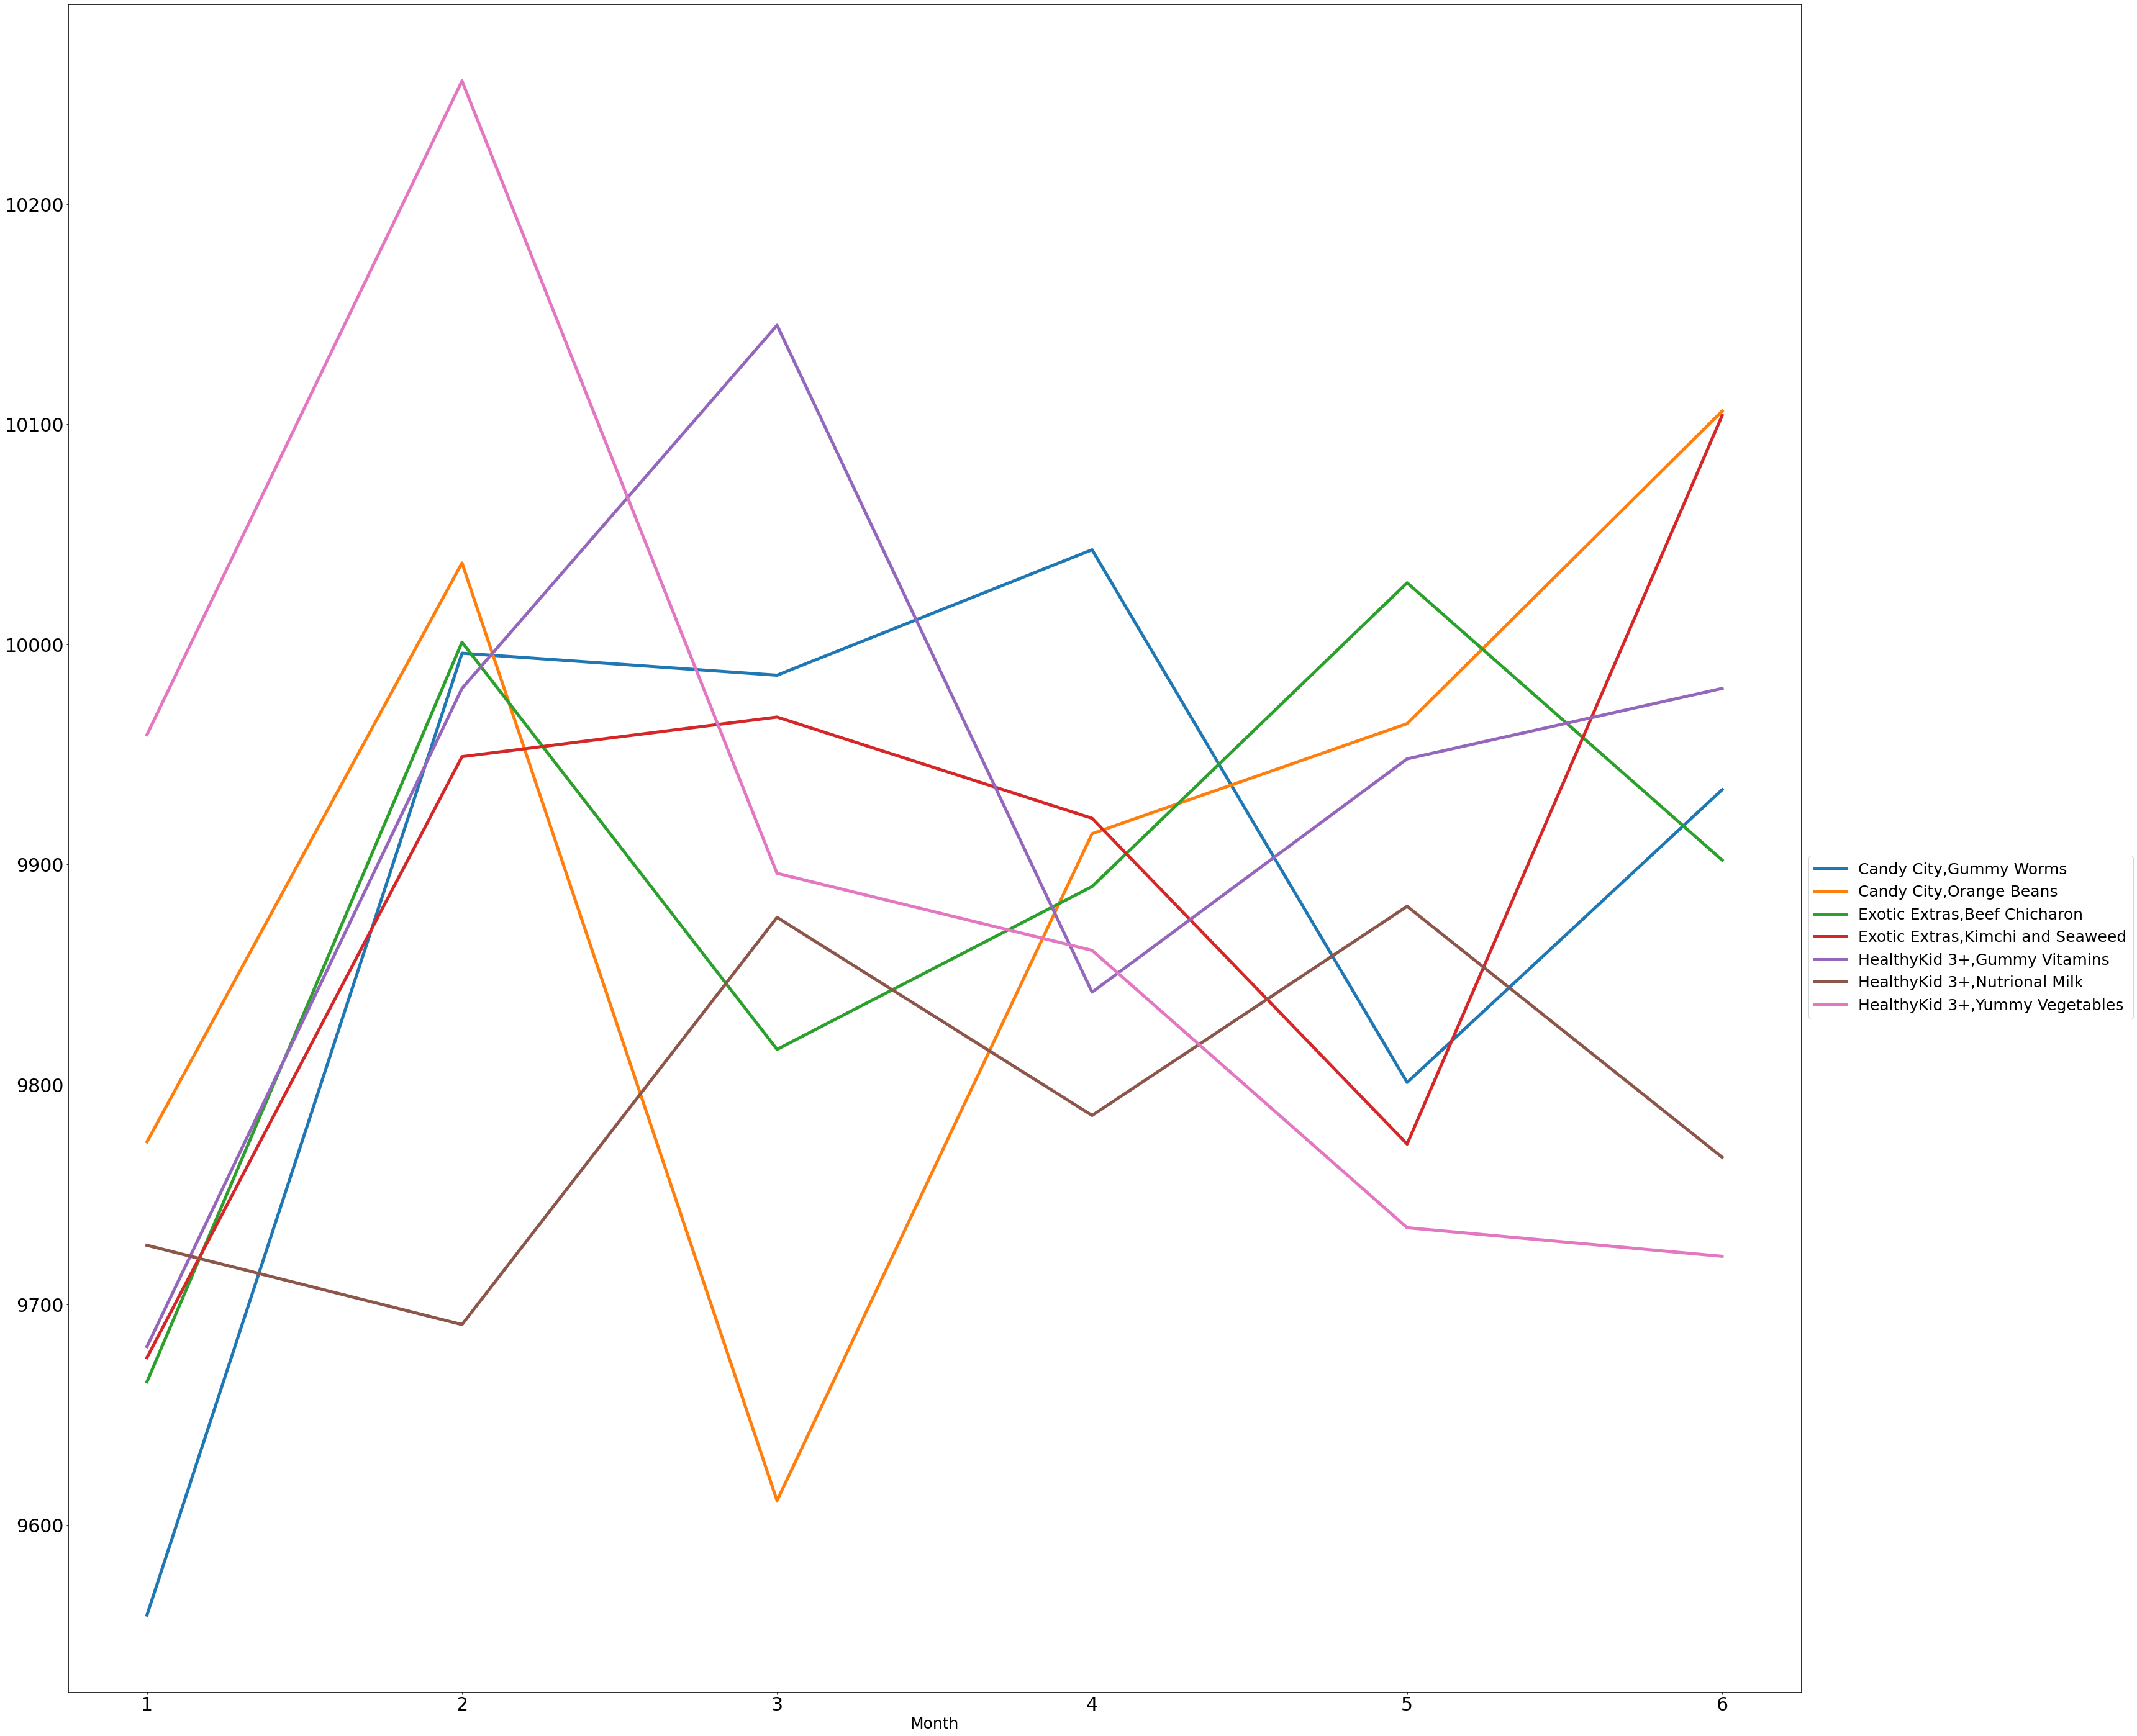

In [16]:
df_g3 = df_2.pivot_table(index=["Month"], columns='transaction_items', values='quantities', aggfunc='sum')
df_g3.plot(kind='line',lw=5,fontsize=30).legend(loc='best',bbox_to_anchor=(1.0, 0.5))


In [17]:

df_cust = df_2[['name']].groupby([df_2.Month]).nunique()
df_cust = df_2[['name']].groupby([df_2.Month]).nunique()
df_cust_1 = df_2[['quantities']].groupby([df_2.name, df_2.Month]).agg(sum)
#df_cust_1 = df_cust_1.reset_index()
#df_cust_1 = df_cust_1.set_index("Month","name")
df_cust_1
new_index = pd.MultiIndex.from_product(df_cust_1.index.levels)
new_df = df_cust_1.reindex(new_index)
new_df = new_df.fillna(0).astype(int)


In [18]:
#new_df = new_df.reset_index()
#new_df = new_df.set_index("Month","name")
engaged = df_2[['name']].groupby([df_2.Month]).nunique()

new_df

quantities
name          Month            
Aaron Beasley 1               0
              2               0
              3               0
              4               9
              5               8
...                         ...
Zachary York  2              17
              3               7
              4              12
              5              23
              6               5

[50922 rows x 1 columns]

In [19]:
new_df['Exists'] = new_df['quantities'].apply(lambda x: True if x >0 else False)

In [20]:
new_df_2 = new_df.unstack(['name'])
new_df_2 = new_df_2['Exists']
new_df_2.index = new_df_2.index.map(int)
new_df_2

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
Month,,,,,,,,,,,,,,,,,,,,,
1,False,True,False,True,True,False,True,True,True,False,...,True,False,True,True,False,True,True,True,False,True
2,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,False,True
3,False,True,True,True,False,False,True,False,True,True,...,True,False,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
5,True,False,True,True,True,True,False,False,True,True,...,True,True,True,True,True,True,True,False,True,True
6,True,True,True,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True


In [21]:
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Columns: 8487 entries, Aaron Beasley to Zachary York
dtypes: bool(8487)
memory usage: 49.8 KB


In [22]:
repeaters = new_df_2.apply(lambda x: [0 if i==1 else (1 if x[i-1] and x[i] else 0)for i in x.index]).transpose().sum()
inactives = new_df_2.apply(lambda x: [0 if i==1 else ((1 if x[i]==0 else 0) if any(x[:i]) else 0) for i in x.index]).transpose().sum()
engaged = new_df_2.apply(lambda x: [1 if all(x[:i]) else 0 for i in x.index]).transpose().sum()

In [23]:
print(repeaters)

Month
1       0
2    5172
3    5216
4    5154
5    5110
6    5193
dtype: int64


In [24]:
print(inactives)

Month
1       0
2    1416
3    1747
4    1909
5    1917
6    1835
dtype: int64


In [25]:
print(engaged)

Month
1    6588
2    5172
3    4126
4    3289
5    2667
6    2190
dtype: int64


In [26]:
table_for_customers = pd.DataFrame({
    'repeater': repeaters,
    'inactive': inactives,
    'engaged' : engaged
    })

table_for_customers=table_for_customers.transpose()

table_for_customers

Month,1,2,3,4,5,6
repeater,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190
